# **Classification**

##### Dataset used: [*IMDB Movie Data*](https://www.kaggle.com/datasets/PromptCloudHQ/imdb-data)


We areusing the data set of 1,000 most popular movies on IMDB in the last 10 years. The data points included are:

**Title, Genre, Description, Director, Actors, Year, Runtime, Rating, Votes, Revenue, Metascrore**

to obtain a suitable classification model for the data, using different machine learning classification models:
1. Logistic Regression
2. Random Forest Classification
3. Support Vector Machine
4. Multinomial Naive Bayes
5. Decision Tree Classification

to analyze various parameters like:

1. Accuracy: proportion of correctly classified instances
2. Precision: ratio of true positive predictions to the total predicted positives
3. F score: harmonic mean of precision and recall
4. ROC: Receiver Operating Characteristic curve
5. AUC: Area Under the Curve
6. Recall: ratio of true positive predictions to the total actual positives

The approach followed for the same would be:
- Data pre-processing
- Selecting the model
- Model Evaluation
- Hyperparameter tuning
- Comparison and Analysis
- Selecting the best model

We will be implementing classification models on the IMDB reviews dataset using scikit-learn.

In the code below, we are importing all the necessary libraries and modules which are used in implementing the models.

In [76]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, learning_curve
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

##Data Preprocessing

We load the dataset from a csv file and the preprocess it.
Then extract "**Description**" column as features (X) and "**Sentiment**" column as the target variable (y).
Assign the 80% of data as training set and 20% as testing set.

In [82]:
# Load dataset
data = pd.read_csv("IMDB-Movie-Data.csv")   #pandas dataframe

# Convert continuous ratings to categorical labels
data["Sentiment"] = np.where(data["Rating"] >= data["Rating"].mean(), 1, 0)

X = data["Description"]  #features
y = data["Sentiment"]    #target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##Model Evaluation

We evaluate the performance of a classification model using various metrics and plot the Receiver Operating Characteristic (ROC) curve if the model supports probability predictions.

Here, "*predict_proba attribute*", indicates whether the model supports probability predictions, then calculates FPR, TPR, and threshold.

The *ROC curve* visually represents the trade-off between the true positive rate and false positive rate at different classification thresholds.

In [78]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("ROC AUC Score:", roc_auc)

    # Plot ROC curve for models supporting predict_proba
    if hasattr(model, "predict_proba"):
        fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])  # calculates threshold
        plt.plot(fpr, tpr)
        plt.title("ROC Curve")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.show()


##Model's Performance

The learning curve shows how the model's performance improves as the size of the training set increases.

We compute the training and test scores at various training set sizes *(train_sizes)* by fitting the model on different subsets of the training data.

Then we calculate the mean and standard deviation of the training and test scores across the cross-validation folds for each training set size and plot the learning curve using *matplotlib*.

In [83]:
#visualize the learning curve
def plot_learning_curve(model, X, y):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.plot(train_sizes, train_mean, label="Training score")
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.5)
    plt.plot(train_sizes, test_mean, label="Cross-validation score")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.5)
    plt.title("Learning Curve")
    plt.xlabel("Number of training examples")
    plt.ylabel("Score")
    plt.legend()
    plt.show()

Here, the key 'model' corresponds to the machine learning model object created with specific hyperparameters.

- For Logistic Regression, the model is initialized with max_iter=1000.
- For Random Forest, the model is initialized with default parameters.
- For Support Vector Machine (SVM), the model is initialized with probability=True.
- For Multinomial Naive Bayes, the model is initialized with default parameters.
- For Decision Tree, the model is initialized with default parameters.

In [84]:
# Define models with hyperparameters for grid search
models = {
    "Logistic Regression": {"model": LogisticRegression(max_iter=1000), "params": {"C": [0.001, 0.01, 0.1, 1, 10, 100]}},
    "Random Forest": {"model": RandomForestClassifier(), "params": {"n_estimators": [50, 100, 200]}},
    "Support Vector Machine": {"model": SVC(probability=True), "params": {"C": [0.1, 1, 10], "gamma": [0.1, 0.01, 0.001]}},
    "Multinomial Naive Bayes": {"model": MultinomialNB(), "params": {"alpha": [0.1, 0.5, 1]}},
    "Decision Tree": {"model": DecisionTreeClassifier(), "params": {"max_depth": [5, 10, 20]}},
}

##Hyperparameter tuning, train, and evaluate

It iterates over each model and extracts the model object and hyperparameters.


It then performs hyperparameter tuning using *GridSearchCV*, which searches over the specified hyperparameter values to find the best combination of hyperparameters that maximizes accuracy ***(scoring='accuracy') using 5-fold cross-validation (cv=5).***

Then, we transform test data using the same CountVectorizer instance, evaluate the model, plot learning curve, and print evaluation results.

Training Logistic Regression
Best parameters: {'C': 0.01}
Evaluation for Logistic Regression
Accuracy: 0.545
Precision: 0.5307692307692308
Recall: 0.696969696969697
F1 Score: 0.6026200873362445
ROC AUC Score: 0.5465046504650466


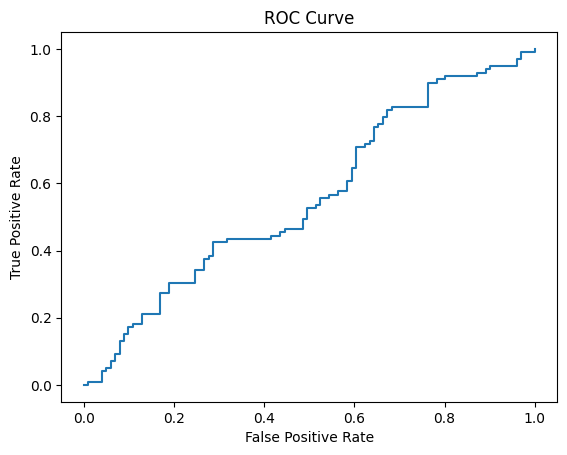

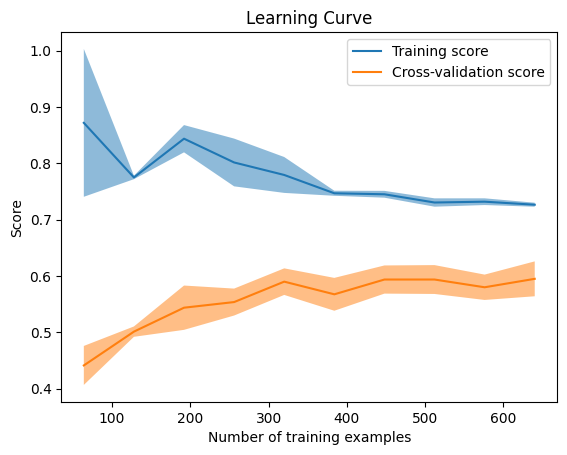

Training Random Forest
Best parameters: {'n_estimators': 50}
Evaluation for Random Forest
Accuracy: 0.56
Precision: 0.5407407407407407
Recall: 0.7373737373737373
F1 Score: 0.6239316239316239
ROC AUC Score: 0.5617561756175617


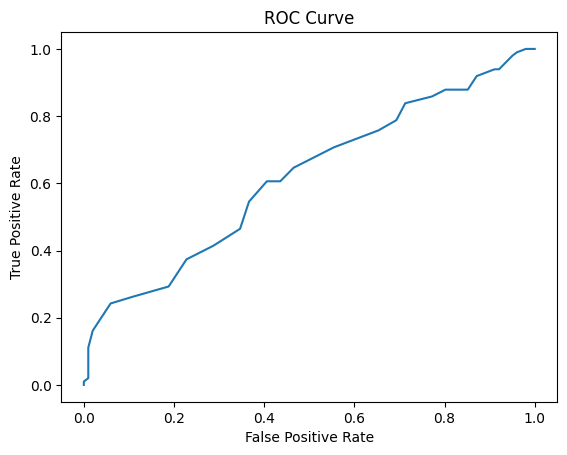

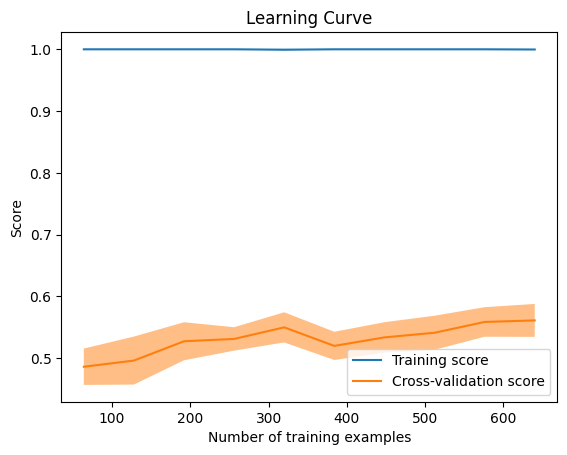

Training Support Vector Machine
Best parameters: {'C': 1, 'gamma': 0.01}
Evaluation for Support Vector Machine
Accuracy: 0.56
Precision: 0.5419847328244275
Recall: 0.7171717171717171
F1 Score: 0.6173913043478261
ROC AUC Score: 0.5615561556155616


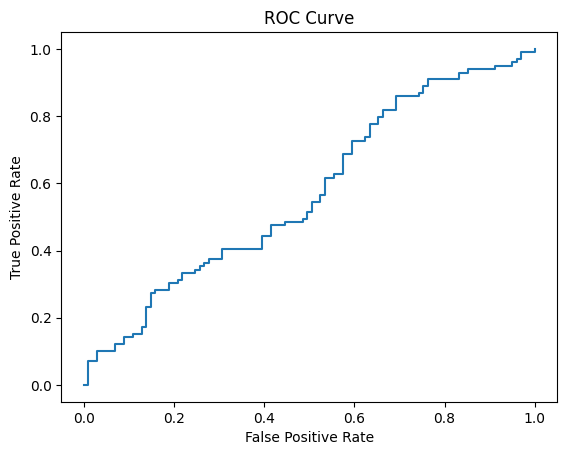

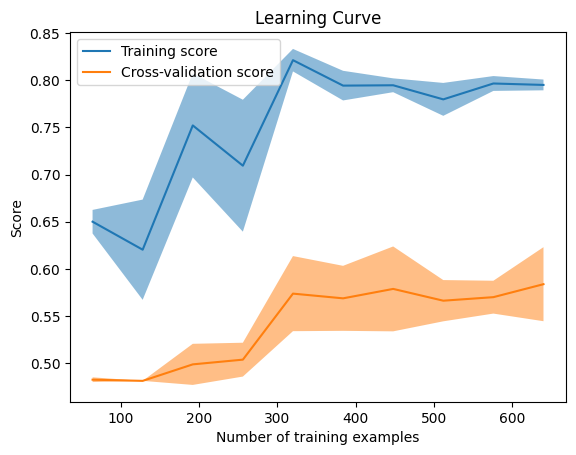

Training Multinomial Naive Bayes
Best parameters: {'alpha': 1}
Evaluation for Multinomial Naive Bayes
Accuracy: 0.585
Precision: 0.5727272727272728
Recall: 0.6363636363636364
F1 Score: 0.6028708133971292
ROC AUC Score: 0.5855085508550855


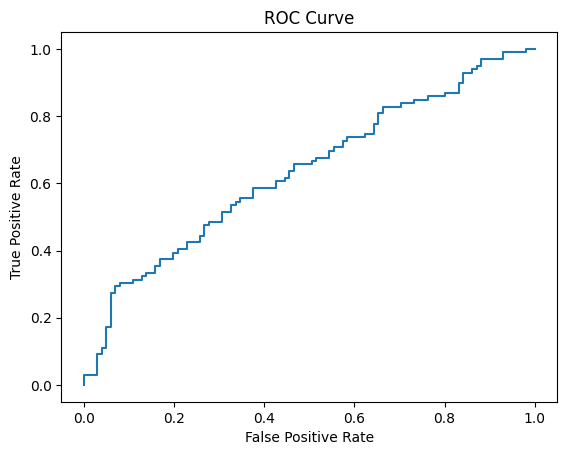

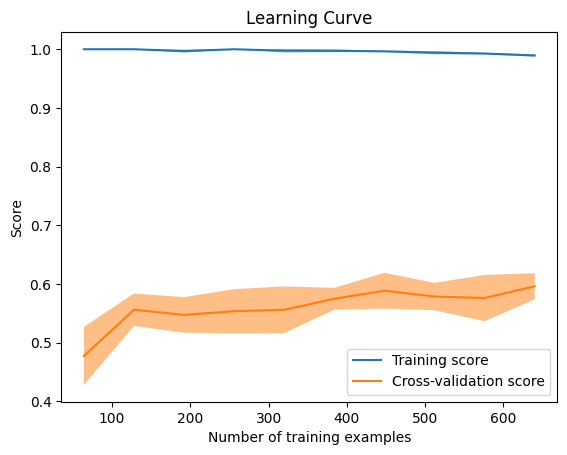

Training Decision Tree
Best parameters: {'max_depth': 5}
Evaluation for Decision Tree
Accuracy: 0.54
Precision: 0.5207100591715976
Recall: 0.8888888888888888
F1 Score: 0.6567164179104478
ROC AUC Score: 0.5434543454345434


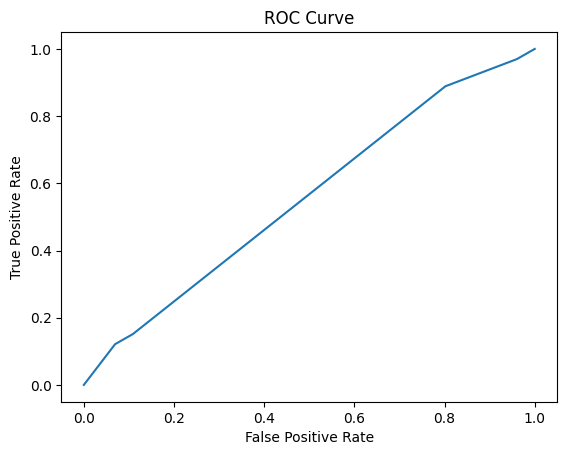

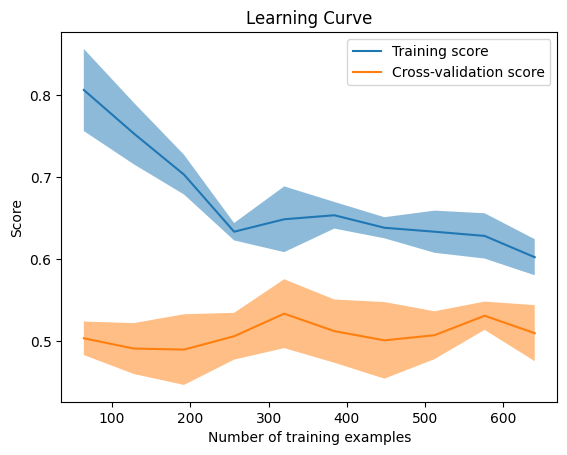

In [85]:
# Create CountVectorizer instance and fit_transform on training data
#converts the text data into a matrix of token countswhich represents the occurrence of each word in the training data.
vectorizer = CountVectorizer()
X_train_transformed = vectorizer.fit_transform(X_train)

# Loop through each model, perform hyperparameter tuning, train, and evaluate
for name, model_info in models.items():
    print("Training", name)
    model = model_info["model"]
    params = model_info["params"]
    grid_search = GridSearchCV(model, params, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_transformed, y_train)
    print("Best parameters:", grid_search.best_params_)
    model = grid_search.best_estimator_

    # Transform test data using the same CountVectorizer instance
    X_test_transformed = vectorizer.transform(X_test)

    print("Evaluation for", name)
    evaluate_model(model, X_test_transformed, y_test)
    plot_learning_curve(model, X_train_transformed, y_train)
    print("="*50)

##Evaluation Results

1. Logistic Regression:
- Accuracy: 0.545       
- Precision: 0.531
- Recall: 0.697
- F1 Score: 0.603
- ROC AUC Score: 0.547

2. Random Forest:
- Accuracy: 0.56
- Precision: 0.541
- Recall: 0.737
- F1 Score: 0.624
- ROC AUC Score: 0.562

3. Support Vector Machine:
- Accuracy: 0.56
- Precision: 0.542
- Recall: 0.717
- F1 Score: 0.617
- ROC AUC Score: 0.562

4. Multinomial Naive Bayes:
- Accuracy: 0.585
- Precision: 0.573
- Recall: 0.636
- F1 Score: 0.603
- ROC AUC Score: 0.586

5. Decision Tree:
- Accuracy: 0.54
- Precision: 0.521
- Recall: 0.889
- F1 Score: 0.657
- ROC AUC Score: 0.543

---
| Patameters | LR | RF | SVM | NV | DT |
| ------------|-------|---------------|---------------|-----|-----|
| Accuracy |0.545       |0.56               |0.56               |0.585     |0.54     |
| Precision |0.531       |0.541               |0.542               |0.573     |0.521     |
| Recall |0.697       |0.737             |0.717               |0.636     |0.889     |
| F1 Score  |0.603       |0.624               |0.617               |0.603     |0.657
| ROC, AUC Score  |0.547       |0.562               |0.562               |0.586     |0.543     |


---
---


Based on these evaluation results, we can observe that the **Multinomial Naive Bayes model has the highest accuracy (0.585) and ROC AUC score (0.586)** among all the models.

Additionally, it achieves competitive precision, recall, and F1 score.

Therefore, we can conclude that the Multinomial Naive Bayes model is the best fit for this dataset based on the provided evaluation results.